# Exercise 07 : Heatmap

In [217]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

### Several exercises back, we wanted to see if there are different patterns for users during working days and weekends. In this exercise, let us find out if there are different patterns for users between different weekdays and between different hours.

In [218]:
connection = sqlite3.connect("../../data/checking-logs.sqlite")

- analyze only the users and not the admins
- you can choose the color palette that you like for both of the graphs that you will need to draw in this exercise
- use the table checker for your query
- use absolute values of the commits, not the averages
- sort the dataframes by the total number of commits made by a user

In [219]:
## Запрос, который достанет datetime для дальнейших манипуляций
select_query = """
SELECT
    c.uid,
    c.timestamp
FROM
    checker c
WHERE
    c.uid LIKE 'user_%'
"""
date_df = pd.io.sql.read_sql(select_query, connection)
date_df['timestamp'] = pd.to_datetime(date_df['timestamp'])
date_df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [220]:
##экстрагируем дни и время
date_df['hour'] = date_df['timestamp'].dt.hour
date_df['weekday'] = date_df['timestamp'].dt.weekday
date_df.drop('timestamp', axis=1, inplace=True)
date_df.sort_values('weekday')
date_df

,uid,hour,weekday
0,user_4,5,4
1,user_4,5,4
2,user_4,5,4
3,user_4,5,4
4,user_4,5,4
...,...,...,...
3202,user_1,20,3
3203,user_1,20,3
3204,user_1,20,3
3205,user_1,20,3


In [221]:
weekday_pivot_df = date_df.pivot_table(
    values='uid',
    index = 'weekday',
    columns = 'uid',
    aggfunc = 'count',
    fill_value = 0
)
sorted_columns = weekday_pivot_df.sum().sort_values(ascending=False).index
weekday_pivot_df = weekday_pivot_df[sorted_columns]
weekday_pivot_df = weekday_pivot_df.reindex(list(range(7)), fill_value=0)
weekday_pivot_df

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
0,35,50,24,14,7,0,23,5,0,46,...,8,10,0,0,1,0,2,0,0,3
1,86,87,131,44,9,1,0,0,16,11,...,4,5,0,0,0,5,3,0,0,0
2,33,0,32,15,0,34,8,0,37,0,...,1,0,0,0,4,3,0,0,0,0
3,108,17,4,40,78,51,96,7,77,7,...,17,14,15,5,2,0,2,0,6,0
4,61,0,0,10,10,2,7,35,1,59,...,0,0,0,0,0,0,0,0,0,0
5,0,79,31,66,21,16,3,90,4,3,...,32,0,0,4,2,0,0,0,0,0
6,45,26,13,44,51,69,28,7,2,8,...,0,31,27,20,9,0,1,8,0,0


In [222]:
hour_pivot_df = date_df.pivot_table(
    values='uid',
    index = 'hour',
    columns = 'uid',
    aggfunc = 'count',
    fill_value = 0
)
hour_pivot_df  = hour_pivot_df[sorted_columns]
hour_pivot_df  = hour_pivot_df.reindex(list(range(24)), fill_value=0)
hour_pivot_df 

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,1,0,0,1,0


In [223]:
#pd.pivot_table(
#    data,               # DataFrame
#    values=None,        # Столбец для агрегации
#    index=None,         # Столбцы для строк
#    columns=None,       # Столбцы для колонок
#    aggfunc='mean',     # Функция агрегации
#    fill_value=None,    # Заполнение пропусков
#    margins=False,      # Добавить итоги
#    margins_name='All'  # Название строки "итого"
#)

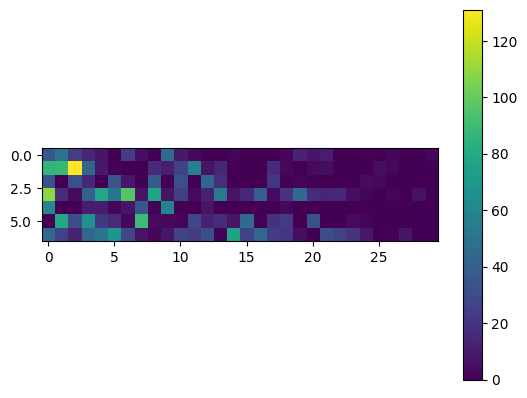

In [224]:
fig, ax = plt.subplots()
heatmap = ax.imshow(weekday_pivot_df, cmap='viridis')
plt.colorbar(heatmap) 
plt.show()

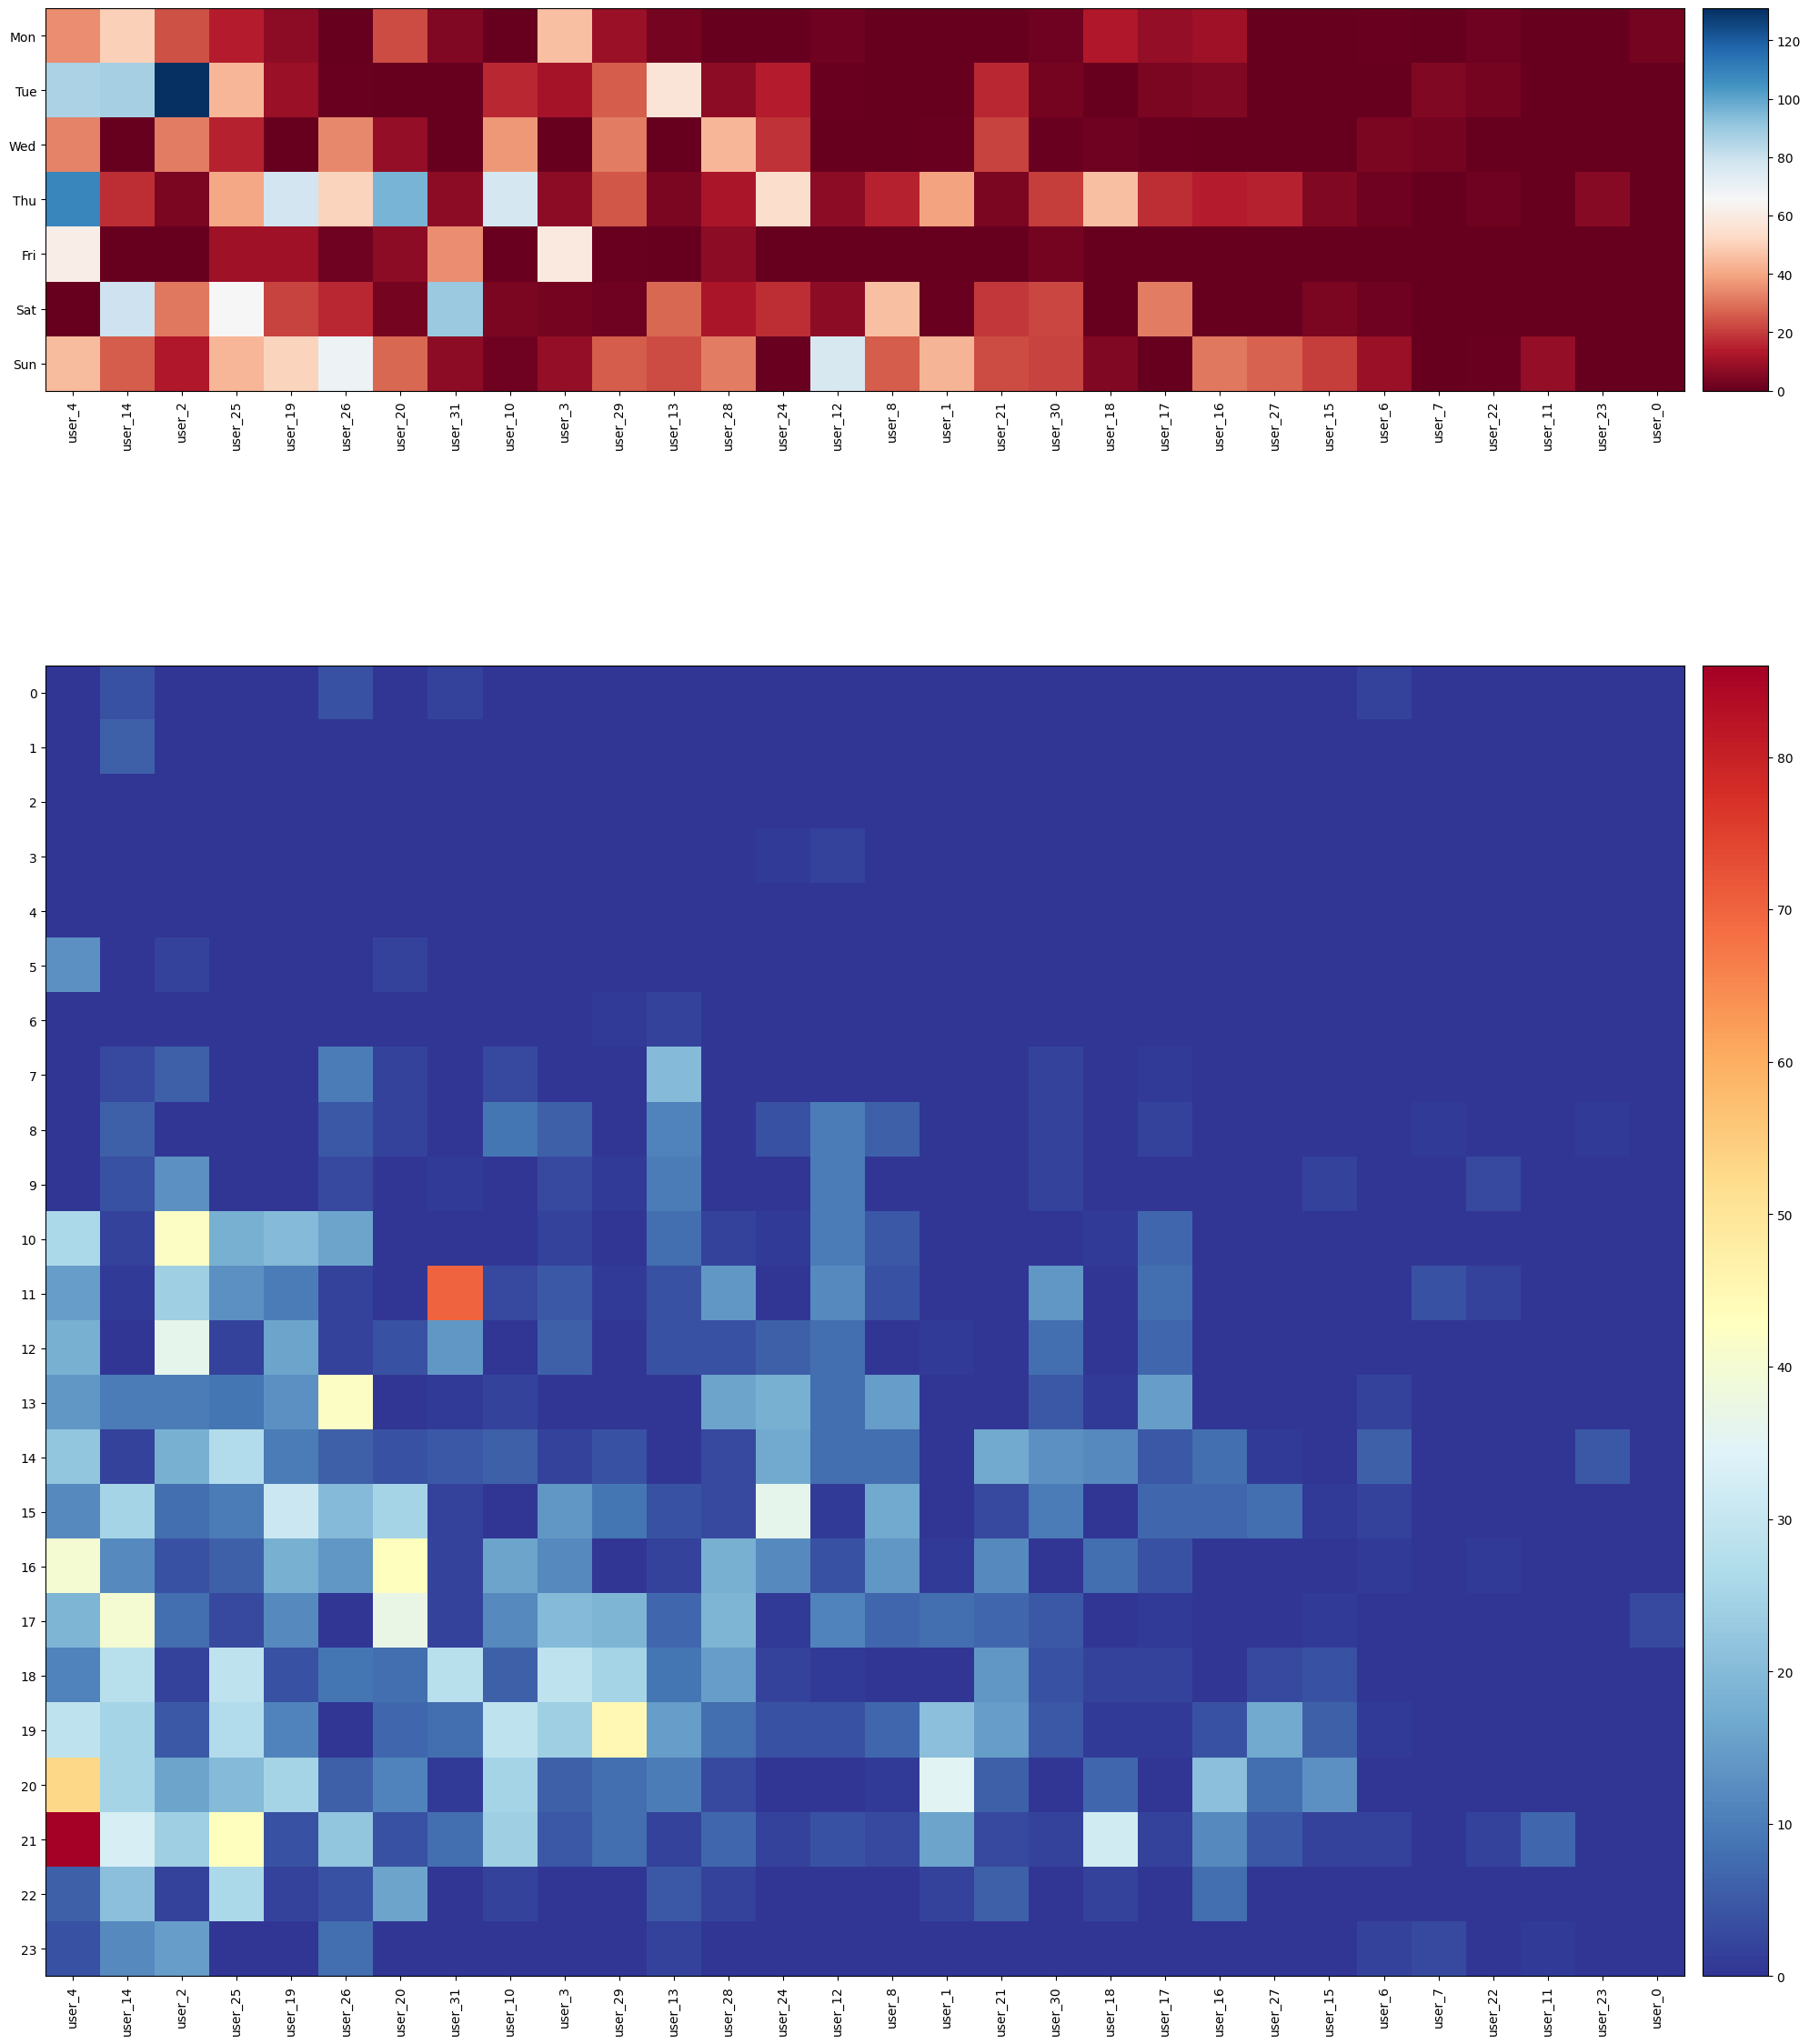

In [225]:
fig, ax = plt.subplots(2,1, figsize=(20,28))

im1 = ax[0].imshow(weekday_pivot_df, cmap='RdBu')
divider1 = make_axes_locatable(ax[0])
cax1 = divider1.append_axes('right', size='4%', pad=0.2)
plt.colorbar(im1, cax=cax1)
ax[0].set_xticks(
    range(len(weekday_pivot_df.columns)),
    labels=weekday_pivot_df.columns, rotation=90
)
ax[0].set_yticks(
    range(len(weekday_pivot_df.index)),
    labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
)


im2 = ax[1].imshow(hour_pivot_df, cmap='RdYlBu_r')
divider2 = make_axes_locatable(ax[1])
cax2 = divider2.append_axes('right', size='4%', pad=0.2)
plt.colorbar(im2, cax=cax2)

ax[1].set_xticks(range(len(hour_pivot_df.columns)), labels=hour_pivot_df.columns, rotation=90)
ax[1].set_yticks(range(len(hour_pivot_df.index)), labels=hour_pivot_df.index)

plt.tight_layout()
plt.show()

## “Which user has the most commits on Tue?
* user_2

## Which user has the most commits on Thu?
* user_4

## On which weekday do the users not like making a lot of commits?
* Mon or Fri

## Which user at which hour made the largest number of commits?
* user_4, 21h

In [226]:
connection.close()